# Data Set Description

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.

Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU


# Load the data


In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [47]:
from tqdm import tqdm

tqdm.pandas()

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn import metrics

In [49]:
df = pd.read_csv(".ipython/SMSSpamCollection", sep = "\t", names = ['target','message'])

df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
# No of nan values
df.isnull().sum()

target     0
message    0
dtype: int64

There is no null values in the data..

## 2. Exploratory Data Analysis


In [52]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
# Shape of data set 
print("No of Rows", df.shape [0])
print("No of Columns", df.shape [1])


No of Rows 5572
No of Columns 2


In [54]:
df["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

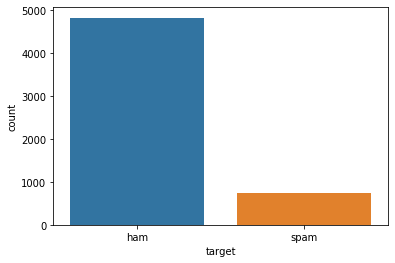

In [55]:
sns.countplot(x = "target", data = df)

This count plot show ham messages are 40k and spam messages are near about 10k.... 

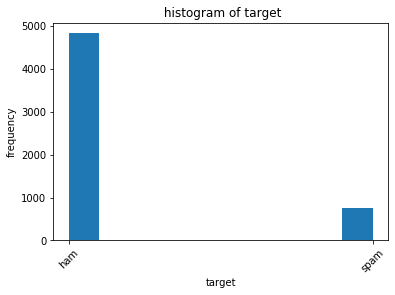

In [56]:
plt.hist(df["target"])
plt.xticks(rotation = 45)
plt.xlabel("target")
plt.ylabel("frequency")
plt.title(" histogram of target")
plt.show()

In [57]:
from wordcloud import WordCloud, STOPWORDS

In [58]:
df_smss = df.loc[df['target']=='spam', :]

df_target.head()

,target,message,clean_df_lema,df_len_lema,num
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...,16,0
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...,15,0
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month u r entitled update latest colour...,16,0
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",six chance win cash pound txt csh send cost p ...,17,0


In [59]:
df_smss['target'].value_counts()



spam    747
Name: target, dtype: int64

In [60]:
words = ' '.join(df_smss['message'])

print(words[:2000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [61]:
df_smss = df.loc[df['target']=='spam', :]

words = ' '.join(df_smss['message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'call'
                            ])



In [62]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)



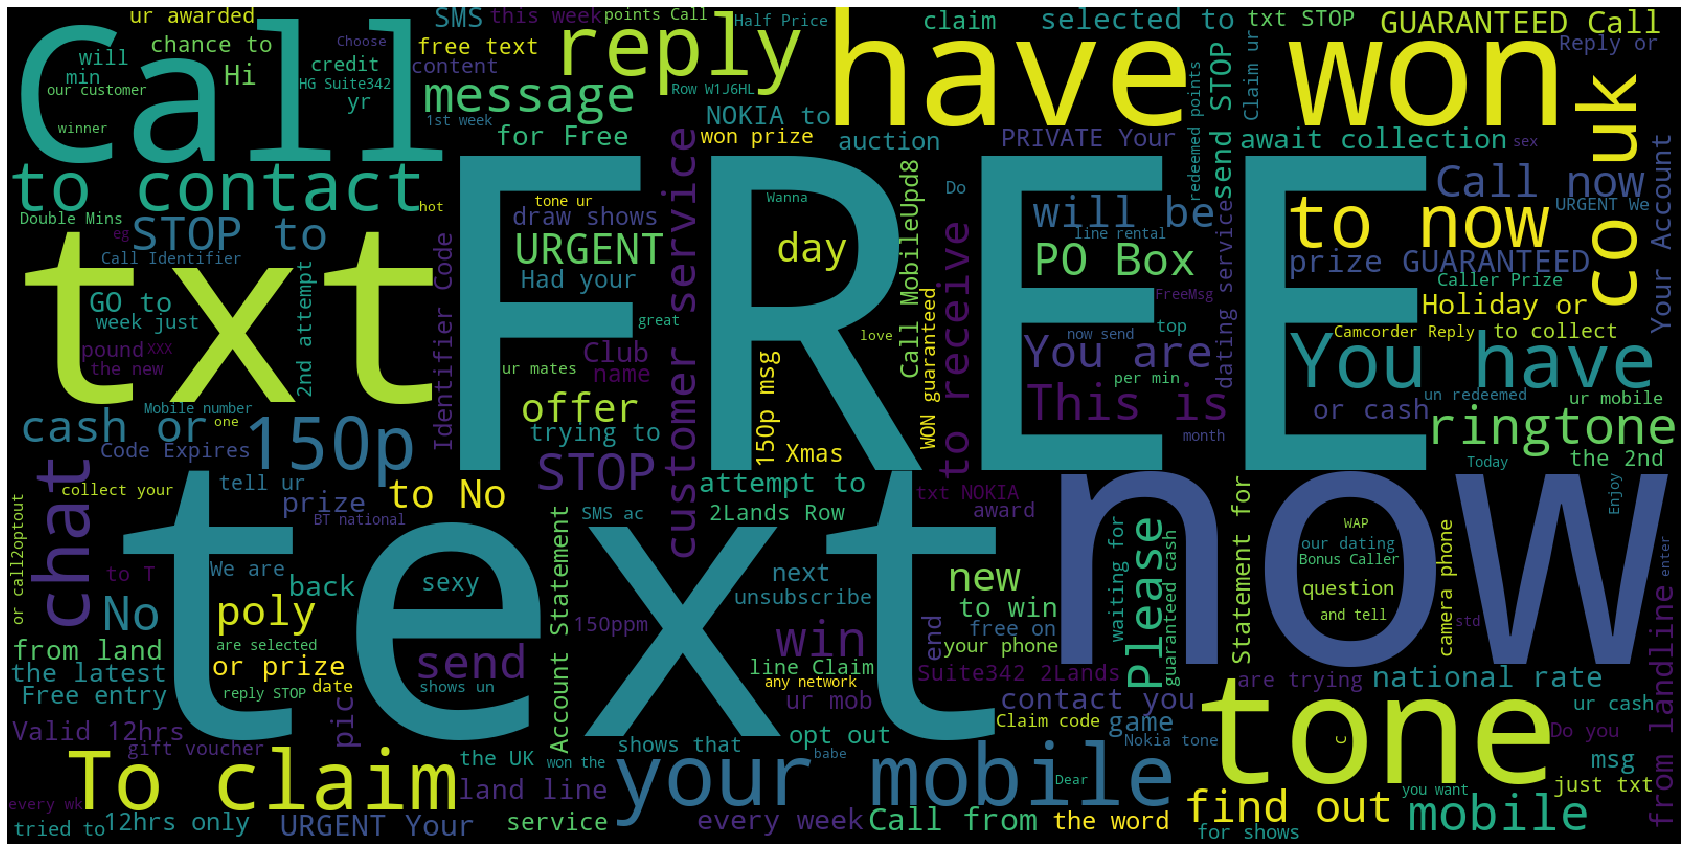

In [63]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [64]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [65]:
## use lemmatizer  insted of stemmer

lemmatizer = WordNetLemmatizer()

In [66]:
# initialising the list 

clean_df_lst = []

df_len_lst = []

In [67]:
# Removing special characters 
def preprocess(raw_df):
    
    letters_only = re.sub("[^a-zA-Z]", " ", raw_df)
 
   # conversion to lowercase
    letters_only = letters_only.lower()
    
   # tokenize into words
    
    words = letters_only.split()
    
   # remove stop words
    
    words = [w for w in words if not w in stopwords.words("english")]
  
   # lemmmatization 

    words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_df_lst.append(" ".join(words))
    
    df_len_lst.append(len(words))
    

In [68]:
clean_df_lst = []

df_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x))

df['clean_df_lema'] = clean_df_lst

df['df_len_lema'] = df_len_lst

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [01:41<00:00, 55.08it/s]


In [69]:
df.head()

,target,message,clean_df_lema,df_len_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


## Data Prepration

In [70]:

 
df['num'] = df['target'].apply(lambda x: 0 if x== "spam" else 1)

df.head()

,target,message,clean_df_lema,df_len_lema,num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7,1


In [71]:
# spliting into test and train

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [72]:
train_clean_df = []

for df in train['clean_df_lema']:
    
    train_clean_df.append(df)

test_clean_df = []

for df in test['clean_df_lema']:
    
    test_clean_df.append(df)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word')

train_features = vectorizer.fit_transform(train_clean_df)

test_features = vectorizer.transform(test_clean_df)

In [74]:
vectorizer.vocabulary_

{'reply': 4463,
 'win': 6061,
 'weekly': 5997,
 'fifa': 1873,
 'world': 6134,
 'cup': 1228,
 'held': 2383,
 'send': 4727,
 'stop': 5170,
 'end': 1654,
 'service': 4746,
 'hello': 2387,
 'sort': 5024,
 'town': 5603,
 'already': 163,
 'dont': 1496,
 'rush': 4583,
 'home': 2445,
 'eating': 1594,
 'nacho': 3523,
 'let': 3004,
 'know': 2891,
 'eta': 1709,
 'come': 1041,
 'guoyang': 2289,
 'go': 2182,
 'tell': 5391,
 'told': 5554,
 'hey': 2401,
 'sathya': 4637,
 'till': 5514,
 'dint': 1433,
 'meet': 3293,
 'even': 1720,
 'single': 4883,
 'time': 5515,
 'saw': 4649,
 'situation': 4896,
 'orange': 3786,
 'brings': 691,
 'ringtones': 4532,
 'chart': 887,
 'hero': 2398,
 'free': 2016,
 'hit': 2416,
 'week': 5995,
 'pic': 3986,
 'wap': 5942,
 'receiving': 4384,
 'tip': 5518,
 'sitting': 4895,
 'mu': 3482,
 'waiting': 5920,
 'everyone': 1729,
 'get': 2139,
 'suite': 5248,
 'take': 5337,
 'shower': 4835,
 'finish': 1897,
 'liao': 3008,
 'urgent': 5789,
 'mobile': 3404,
 'awarded': 398,
 'bonus': 62

In [75]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data:", train_features.shape)


Total unique words: 6278
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4457, 6278)


## Model Build and Evaluation

In [78]:
# LogisticRegression , DecisionTree , SVC
classifiers = [LogisticRegression(),
              DecisionTreeClassifier(),
              SVC()]


### Accuracy Score , Confusion Metices , Classification_report

In [80]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(classifiers):
    fit = classifier.fit(dense_features,train['num'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['num'])
    Con_metric=metrics.confusion_matrix(pred,test['num'])
    Class_metric=metrics.classification_report(pred,test['num'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print('\nConfusion metrics of '+classifier.__class__.__name__+' is \n'+str(Con_metric))
    print('\nClassification report of '+classifier.__class__.__name__+' is \n\n'+str(Class_metric))

 33%|████████████████████████████                                                        | 1/3 [00:04<00:09,  4.67s/it]

Accuracy of LogisticRegression is 0.9847533632286996

Confusion metrics of LogisticRegression is 
[[132   0]
 [ 17 966]]

Classification report of LogisticRegression is 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115



 67%|████████████████████████████████████████████████████████                            | 2/3 [03:01<00:56, 56.26s/it]

Accuracy of DecisionTreeClassifier is 0.9739910313901345

Confusion metrics of DecisionTreeClassifier is 
[[129   9]
 [ 20 957]]

Classification report of DecisionTreeClassifier is 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       138
           1       0.99      0.98      0.99       977

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.98      0.97      0.97      1115



100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [06:22<00:00, 127.54s/it]

Accuracy of SVC is 0.9847533632286996

Confusion metrics of SVC is 
[[132   0]
 [ 17 966]]

Classification report of SVC is 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115

